# Multi-Class Imbalanced Classification
~ Last Updated on January 5, 2021 <br/>
~ Jason Brownlee

source: https://machinelearningmastery.com/multi-class-imbalanced-classification/

Imbalanced classification are those prediction tasks where the distribution of examples across class labels is not equal.

Most imbalanced classification examples focus on binary classification tasks, yet many of the tools and techniques for imbalanced classification also directly support multi-class classification problems.

In this tutorial, you will discover how to use the tools of imbalanced classification with a multi-class dataset.

After completing this tutorial, you will know:

* About the glass identification standard imbalanced multi-class prediction problem.
* How to use SMOTE oversampling for imbalanced multi-class classification.
* How to use cost-sensitive learning for imbalanced multi-class classification.


## Tutorial Overview

This tutorial is divided into three parts; they are:

1. Glass Multi-Class Classification Dataset
1. SMOTE Oversampling for Multi-Class Classification
1. Cost-Sensitive Learning for Multi-Class Classification


### Import Libraries

In [11]:
import sys
sys.path.append('../')

from pathlib import Path
from urllib.request import urlretrieve

# check version number
import imblearn
print(f"{imblearn.__version__ = }")

from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

imblearn.__version__ = '0.10.1'


### setup local paths

In [2]:
path_curr = Path.cwd()
print(f'{path_curr = }')
parent = path_curr.parent
print(f'{parent = }')
path_data = parent / 'data'
path_images = parent / 'images'
path_src = parent / 'src'

if not path_data.exists():
    # Path(path_images).mkdir(parents=True, exist_ok=True)
    Path(path_data).mkdir(parents=True, exist_ok=True)
    # Path(path_src).mkdir(parents=True, exist_ok=True)
    print(f'subfolders did not exist, have been created')
    
print(f'{path_images = }')
print(f'{path_data = }')

path_curr = PosixPath('/home/ellanix/repos/jupyterbook/today-I-learned/9_Practicals')
parent = PosixPath('/home/ellanix/repos/jupyterbook/today-I-learned')
path_images = PosixPath('/home/ellanix/repos/jupyterbook/today-I-learned/images')
path_data = PosixPath('/home/ellanix/repos/jupyterbook/today-I-learned/data')


### Get dataset

In [16]:
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
date_desc = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.names'

path_glass = path_data / 'glass.csv'

urlretrieve(data_url, path_glass)
urlretrieve(date_desc, path_data / 'glass_desc.txt')

(PosixPath('/home/ellanix/repos/jupyterbook/today-I-learned/data/glass_desc.txt'),
 <http.client.HTTPMessage at 0x7f170747b370>)

### load and summarize the dataset

In [17]:
# define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = read_csv(path_glass, header=None)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


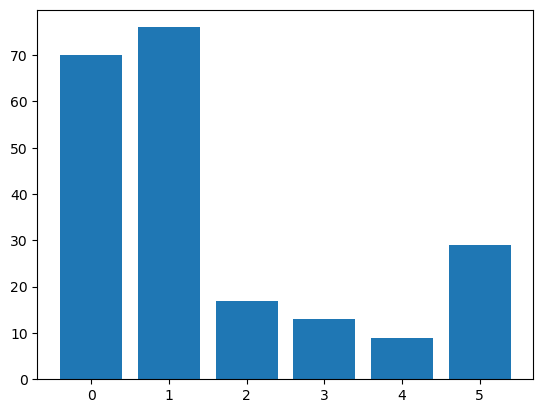

In [9]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [7]:
df

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Class=0, n=76 (16.667%)
Class=1, n=76 (16.667%)
Class=2, n=76 (16.667%)
Class=3, n=76 (16.667%)
Class=4, n=76 (16.667%)
Class=5, n=76 (16.667%)


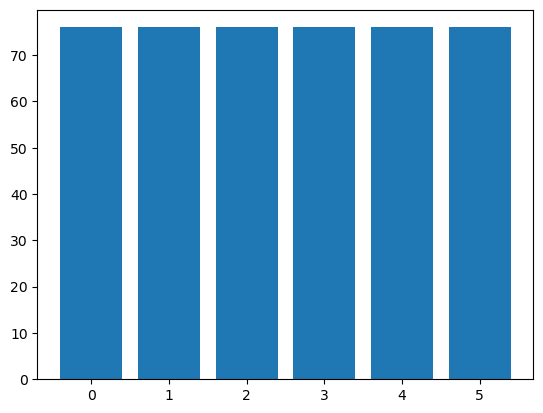

In [13]:
# example of oversampling a multi-class classification dataset

# define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
# df = read_csv(url, header=None)
# data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Instead of using the default strategy of SMOTE to oversample all classes to the number of examples in the majority class, we could instead specify the number of examples to oversample in each class.

For example, we could oversample to 100 examples in classes 0 and 1 and 200 examples in remaining classes. This can be achieved by creating a dictionary that maps class labels to the number of desired examples in each class, then specifying this via the “sampling_strategy” argument to the SMOTE class.

```...
# transform the dataset
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
```

Class=0, n=100 (10.000%)
Class=1, n=100 (10.000%)
Class=2, n=200 (20.000%)
Class=3, n=200 (20.000%)
Class=4, n=200 (20.000%)
Class=5, n=200 (20.000%)


/home/ellanix/miniconda3/envs/base310/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #1 -> 76)
  warnings.warn(
/home/ellanix/miniconda3/envs/base310/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #1 -> 76)
  warnings.warn(
/home/ellanix/miniconda3/envs/base310/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (200) in class 2 will be larger than the number of samples in the majority class (class #1 -> 76)
  warnings.warn(
/home/ellanix/miniconda3/envs/base310/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (200) in class 3 will b

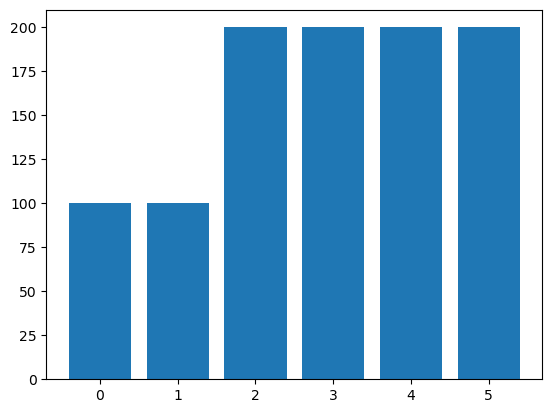

In [15]:
# example of oversampling a multi-class classification dataset with a custom strategy
# from pandas import read_csv
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# # define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# # load the csv file as a data frame
# df = read_csv(url, header=None)
# data = df.values 
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Note: when using data sampling like SMOTE, it must only be applied to the training dataset, not the entire dataset. I recommend using a Pipeline to ensure that the SMOTE method is correctly used when evaluating models and making predictions with models.

## Cost-Sensitive Learning for Multi-Class Classification

Most machine learning algorithms assume that all classes have an equal number of examples.

This is not the case in multi-class imbalanced classification. Algorithms can be modified to change the way learning is performed to bias towards those classes that have fewer examples in the training dataset. This is generally called cost-sensitive learning.

In [19]:
# baseline model and test harness for the glass identification dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the location of the dataset
# full_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the dataset
X, y = load_dataset(path_glass)
# define the reference model
model = RandomForestClassifier(n_estimators=1000)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.794 (0.054)


We can specify the “class_weight” argument to the value “balanced” that will automatically calculates a class weighting that will ensure each class gets an equal weighting during the training of the model.

In [20]:
# cost sensitive random forest with default class weights
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the location of the dataset
# full_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the dataset
X, y = load_dataset(path_glass)
# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.805 (0.043)


The “class_weight” argument takes a dictionary of class labels mapped to a class weighting value.

We can use this to specify a custom weighting, such as a default weighting for classes 0 and 1.0 that have many examples and a double class weighting of 2.0 for the other classes.

```...
# define the model
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
```

Tying this together, the complete example of using a custom class weighting for cost-sensitive learning on the glass multi-class imbalanced classification problem is listed below.

In [22]:
# cost sensitive random forest with custom class weightings
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the location of the dataset
# full_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the dataset
X, y = load_dataset(path_glass)
# define the model
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.807 (0.056)
